|                                                                                                                                                                      |
|----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 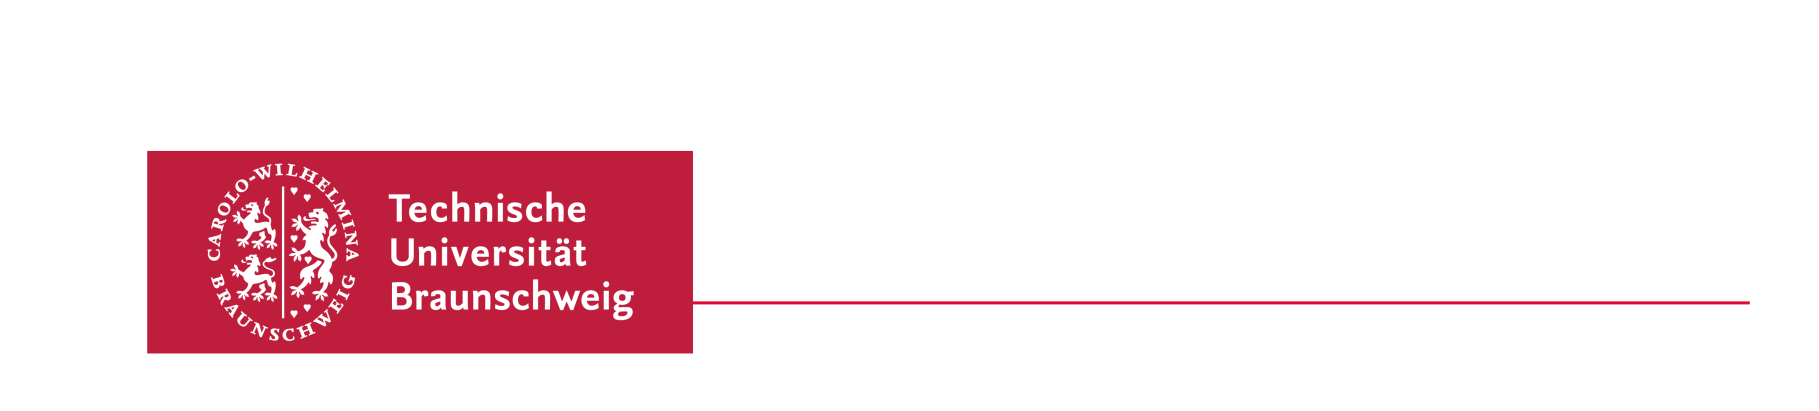 |

**Rechnerübung zur Signalübertragung II**

***Versuch 2: Nyquist-Kriterium***

**Teil 2.1 Sendesignal und Ausgangssignal des Korrelationsfilters
erzeugen**

Abbildung 1 zeigt ein allgemeines Datenübertragungssystem. Mit diesem
System soll nun ein binärer Datenstrom übertragen werden. Die Quelle
(NQ) erzeugt zu den diskreten Zeitpunkten $\text{nT}$ jeweils einen
Binärwert $a_{n}$. Die Folge der $a_{n}$ kann als Musterfunktion eines
binären, zeitdiskreten Zufallsprozesses angesehen werden.

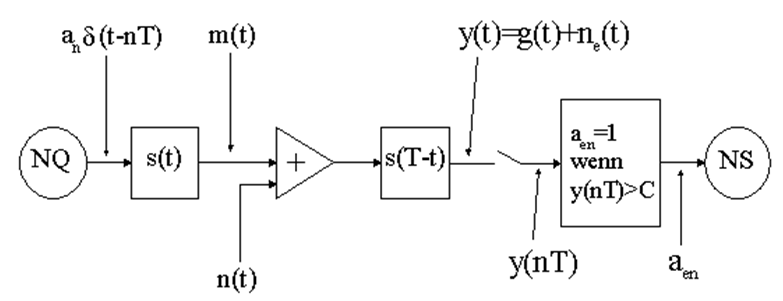

Abbildung 1: Modell eines Übertragungssystems

Im Sender werden die zeitdiskreten Binärwerte dann einer Filterung zur
Gestaltung der Sendesignalform unterzogen. Das Sendesignal hat die Form

, wobei$\text{\ a}_{n}$die Werte 0 und 1 annehmen kann.

Das Trägersignal kann beispielsweise rechteckförmig sein. Dies soll nun
an einem Beispiel dargestellt werden.

Öffnen Sie die Datei „Versuch2.m“ und führen Sie das Programm aus.

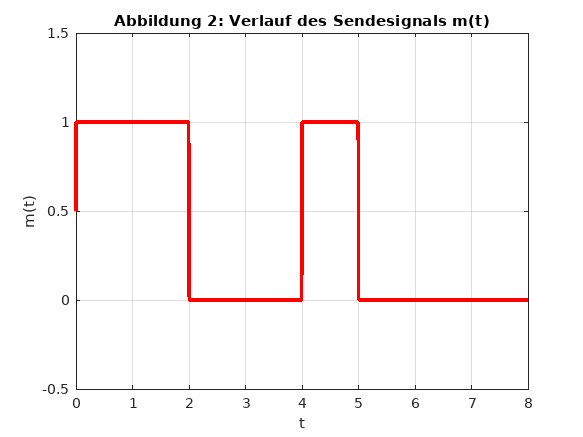

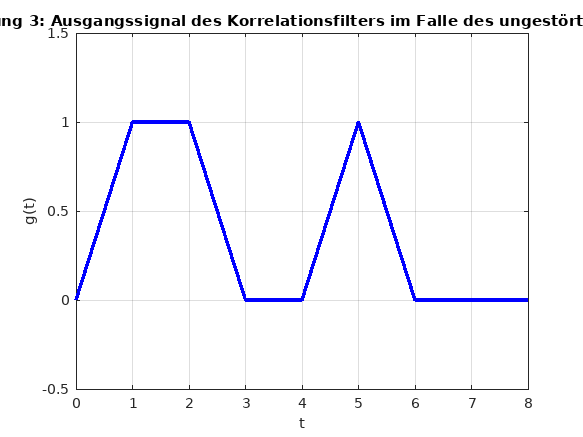

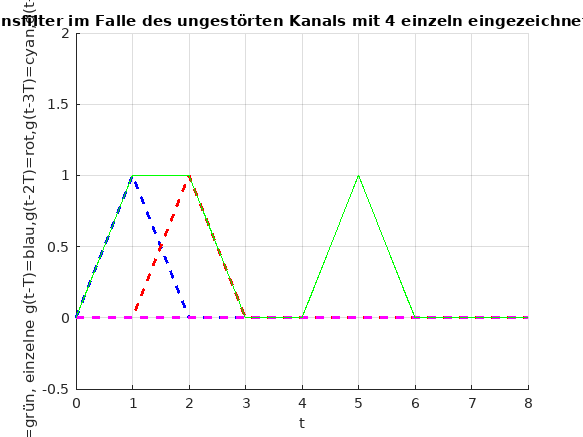

TD:
     1

die gesendeten Datenbits a[i]:
     1     1     0     0     1     0     0     0

die empfangenen Datenbits g[i]:
     1     1     0     0     1     0     0     0

Anzahl der fehlerhaften Datenbits (ohne Rauschen):
     0



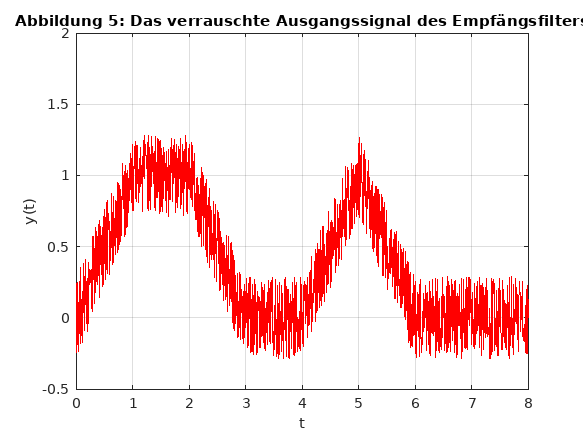

n_max:
    0.2900

die gesendeten Datenbits a[i]:
     1     1     0     0     1     0     0     0

die verrauschten Abtastwerte y[i]:
    1.0531    0.9004    0.1843   -0.1416    0.7245    0.1568   -0.1884    0.0487

die geschätzten Datenbits a_en[i]:
     1     1     0     0     1     0     0     0

Anzahl der fehlerhaften Datenbits (mit Rauschen):
     0



In [1]:
Versuch2;

Einige Definitionen der verwendeten Matlab-Funktionen:

-   Definition der Taktzeit:

-   Definition der Rechteckfunktion:

<!-- -->

-   Definition der Form des Sendesignals:

-   Sendesignal:

-   Dargestellter Zeitbereich:

-   Definition einer Beispielbinärfolge:

( In dem Matlab-Code können Sie die Binärfolge ändern. Gegebenes
Beispiel:$a_{i} = 11001110$. In „Figure 1“ wird Das Sendesignal für die
gegebene Folge dargestellt.)

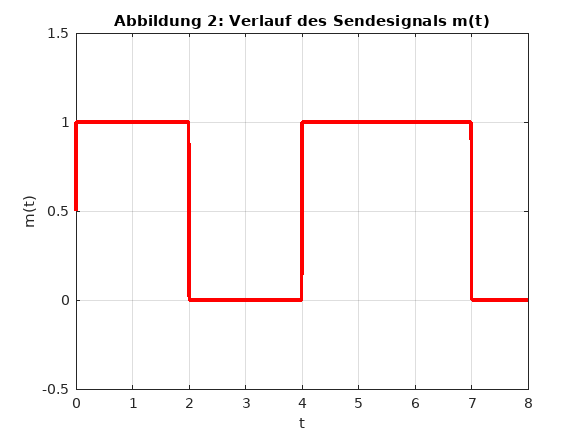

In [2]:
a = [1 1 0 0 1 1 1 0];

%  Sendesignal m(t)
m = 0;
for i = 0:7
    m = m + a(i+1)*(heaviside(t-i)-heaviside(t-i-1));
end

%  m(t) plotten
figure(1)
plot(t,m,'LineWidth',2.5,'Color',[1 0 0]);
axis([0 8 -0.5 1.5]);
grid on
hold off
title('Abbildung 2: Verlauf des Sendesignals m(t)')
xlabel('t')
ylabel('m(t)')

Vorausgesetzt, dass der Kanal störungsfrei ist, erhält man am
Empfängerausgang ein Signal der Form , wobei die
Autokorrelationsfunktion der Filterstoßantwort ist.

-   Definition der Dreiecksfunktion:

-   Autokorrelationsfunktion:

-   Ausgangssignal des Korrelationsfilters:

> „Figure 2“ zeigt den Verlauf des zugehörigen Ausgangssignals im Falle
> des ungestörten Kanals.

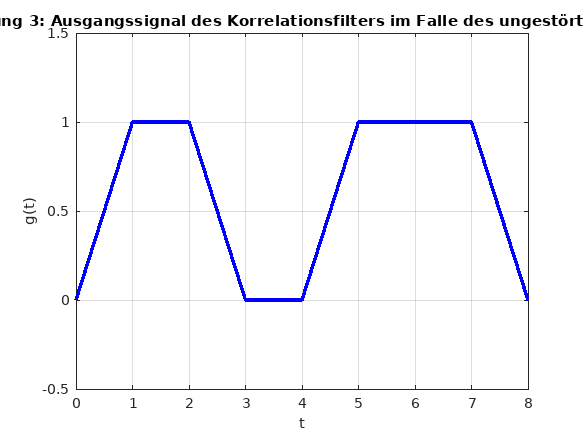

In [3]:
%  Ausgangssignal des Korrelationsfilters g(t)
g = 0;
for i = 0:7
    g = g + a(i+1)*(((heaviside(t-i)-heaviside(t-i-1)).*(t-i))...
                  +((heaviside(t-i-1)-heaviside(t-i-2)).*(i+2-t)))  ;
end

%  g(t) plotten
figure(2)
plot(t,g,'LineWidth',2.5,'Color',[0 0 1]);
axis([0 8 -0.5 1.5]);
grid on
title('Abbildung 3: Ausgangssignal des Korrelationsfilters im Falle des ungestörten Kanals')
xlabel('t')
ylabel('g(t)')

Tastet man nun zu den Zeitpunkten$\text{\ nT}$ ab, so erhält man wieder
die Ausgangsbinärfolge. Die Abtastung wird in Matlab durch erreicht.
(Die Verzögerung um T ist notwendig, da man keine nichtkausalen Filter
realisieren kann.)

Zum Vergleich sind auf Matlab-Command-Window gesendete$a_{i}$und
empfangene$g_{i}$Binärfolge dargestellt.

„Figure 3“ zeigt erneut das Ausgangssignal des Korrelationsempfängers,
wobei die Einzelimpulse für n=0…3 gestrichelt dargestellt sind. Man kann
daran gut erkennen, dass die Autokorrelationsfunktion an allen anderen
Abtastwerten außer den Abtastwert Null besitzt. Wäre dies nicht der
Fall, würden sich diese Störterme anderen Abtastwerten überlagern und
dadurch Eigeninterferenzen hervorrufen. Diese Interferenz wird auch als
Intersymbolinterferenz bezeichnet.

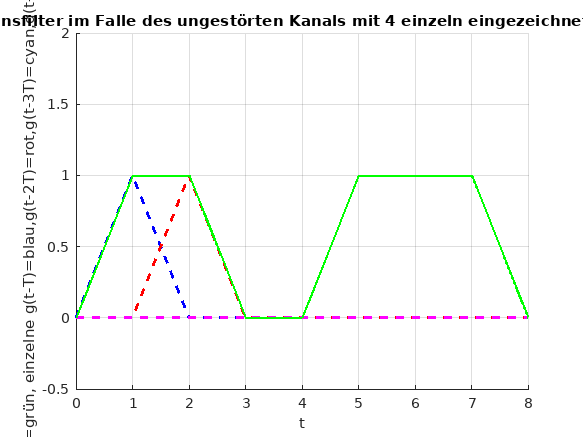

In [4]:
%  TD ist die Dauer der Autokorrelationsfunktion
%  Grundeinstellung TD = 1.0, hier kann die Dauer beispielsweise auf den
%  Wert 1.4 erhöht werden.
%  Sie können TD ändern -->
TD = 1.0;

Dif = TD - 1;

%  Ausgangssignal des Korrelationsfilters g(t)
figure(3); 
hold on;
g_TD = 0;
g_einzel = zeros(8,1801);
for i = 0:7
    g_einzel(i+1,:) = a(i+1)*(((heaviside(t-i+Dif)-heaviside(t-i-1)).*(t/TD-i/TD+(1-1/TD)))...
                +((heaviside(t-i-1)-heaviside(t-i-2-Dif)).*(i/TD-t/TD+(1+TD)/TD)));
    % die einzelnen Autokorrelationsfunktionen plotten
    switch i
        case 0
            plot(t,g_einzel(i+1,:),'b--','LineWidth',2);
        case 1
            plot(t,g_einzel(i+1,:),'r--','LineWidth',2);
        case 2
            plot(t,g_einzel(i+1,:),'c--','LineWidth',2);
        case 3
            plot(t,g_einzel(i+1,:),'m--','LineWidth',2);
            
    end
    
    g_TD = g_TD + a(i+1)*(((heaviside(t-i+Dif)-heaviside(t-i-1)).*(t/TD-i/TD+(1-1/TD)))...
                +((heaviside(t-i-1)-heaviside(t-i-2-Dif)).*(i/TD-t/TD+(1+TD)/TD)));
  
end

%  g(t) plotten

plot(t,g_TD,'g','LineWidth',1.5);
axis([0 8 -0.5 2]);
grid on
title('Abbildung 4: Ausgangssignal des Korrelationsfilter im Falle des ungestörten Kanals mit 4 einzeln eingezeichneten verschobenen Autokorrelationsfunktionen')
xlabel('t')
ylabel('Summe g(t)=grün, einzelne g(t-T)=blau,g(t-2T)=rot,g(t-3T)=cyan,g(t-4T)=magenta')


-   Ausgangssignal des Korrelationsfilters:

**  
**

**Teil 2.2 Erhöhung der Dauer der Autokorrelationsfunktion**

Erhöht man nun die Dauer der Rechteckfunktion und damit auch die der
Autokorrelationsfunktion, so kann man Intersymbolinterferenz bewusst
hervorrufen.

Mit dem Parameter $T_{D}$, der in der Grundeinstellung auf 1.0 normiert
ist, kann die Dauer beispielsweise auf den Wert 1.4 erhöht werden.

In dem Matlab-Code können Sie die Dauer $T_{D}$ändern und das Programm
erneut ausführen

In [24]:
TD=1.4;
Dif = TD - 1;
g_TD = 0;
for i = 0:7 
    g_TD = g_TD + a(i+1)*(((heaviside(t-i+Dif)-heaviside(t-i-1)).*(t/TD-i/TD+(1-1/TD)))...
                +((heaviside(t-i-1)-heaviside(t-i-2-Dif)).*(i/TD-t/TD+(1+TD)/TD)));
end

Wie sieht die Autokorrelationsfunktion nun aus?

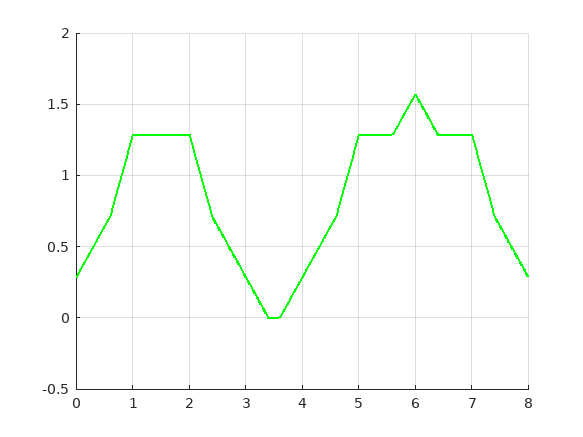

In [25]:
axis([0 8 -0.5 2]);
grid on
hold on
plot(t,g_TD,'g','LineWidth',1.5);

Welchen Einfluss hat die Erhöhung der Dauer auf die Abtastwerte$\text{\ g}_{i}(nT)$?

>Werte werden auf über 1 angehoben; angrenzende Nullen werden auch angehoben

In [27]:
bit_stats(g_TD, TD, a)

TD:
    1.4000

die gesendeten Datenbits a[i]:
     1     1     0     0     1     1     1     0

die empfangenen Datenbits g[i]:
     1     1     0     0     1     1     1     0

Anzahl der fehlerhaften Datenbits (ohne Rauschen):
     0



Nun wird ein Schwellwertentscheider am Ausgang des Filters im Empfänger
angeschlossen. Dieser Schwellwertentscheider entscheidet mit der Grenze
C=0.5 zwischen einer Null und einer Eins.

Könnte die ursprüngliche Folge aus den Abtastwerten regeneriert werden,
wenn $T_{D} = 1.5$ beträgt? Untersuchen Sie es mit unterschiedlichen
Bitfolgen und vergleichen Sie die $a_{i}$und$\text{\ \ g}_{i}$.

In [16]:
TD=1.5;
Dif = TD - 1;
g_TD = 0;
for i = 0:7 
    g_TD = g_TD + a(i+1)*(((heaviside(t-i+Dif)-heaviside(t-i-1)).*(t/TD-i/TD+(1-1/TD)))...
                +((heaviside(t-i-1)-heaviside(t-i-2-Dif)).*(i/TD-t/TD+(1+TD)/TD)));
end

bit_stats(g_TD, TD, a)

TD:
    1.5000

die gesendeten Datenbits a[i]:
     1     1     0     0     1     1     1     0

die empfangenen Datenbits g[i]:
     1     1     0     0     1     1     1     0

Anzahl der fehlerhaften Datenbits (ohne Rauschen):
     0



**Teil 2.3 Der Einfluss des Rauschens**

Auf der Übertragungsstrecke wird nun zu dem
Sendesignal$\text{\ m}\left( t \right)$noch Rauschen $n(t)$
hinzuaddiert. Am Ausgang des Empfängers erhält man das Signal
$y\left( t \right) = g\left( t \right) + n_{e}(t)$, wobei $n_{e}(t)$ das
mit$\ s(T - t)$gefaltete Rauschen ist (siehe Abbildung 1). Dieser
Rauschanteil am Ausgang soll durch eine Matlab-Funktion erzeugt werden:

In dem Matlab-Code können Sie den Maximalwert des Rauschens ändern

z.B. Maximalwert des Rauschens: $n_{\max} = 0.29$

In [28]:
%  Maximalwert des Rauschens
%  Sie können n_max ändern -->
n_max = 0.29;

%  Rauschsignal
n_e = 2*(n_max*rand(1,length(t))-n_max/2);

%  Summensignal am Ausgang des Empfängsfilters
y = g_TD + n_e;

bit_stats_noise(a, y, C, n_max)

n_max:
    0.2900

die gesendeten Datenbits a[i]:
     1     1     0     0     1     1     1     0

die verrauschten Abtastwerte y[i]:
    1.0034    1.3408    0.2884    0.5288    1.3097    1.4034    1.4664    0.3263

die geschätzten Datenbits a_en[i]:
     1     1     0     1     1     1     1     0

Anzahl der fehlerhaften Datenbits (mit Rauschen):
     1



Rauschsignal:
$n_{e}\left( t \right) = 2 \bullet \lbrack rand\left( n_{\max} \right) - \frac{n_{\max}}{2}\rbrack$

Summensignal am Ausgang des Empfängerfilters:
$y\left( t \right) = g\left( t \right) + n_{e}(t)$

Das erzeugte Rauschsignal kann Werte zwischen ${- n}_{\max}$und
$+ n_{\max}$annehmen und ist in diesem Bereich gleichverteilt. Den
Verlauf einer Musterfunktion des Ausgangssignals
$y\left( t \right)$zeigt „Figure 4“.

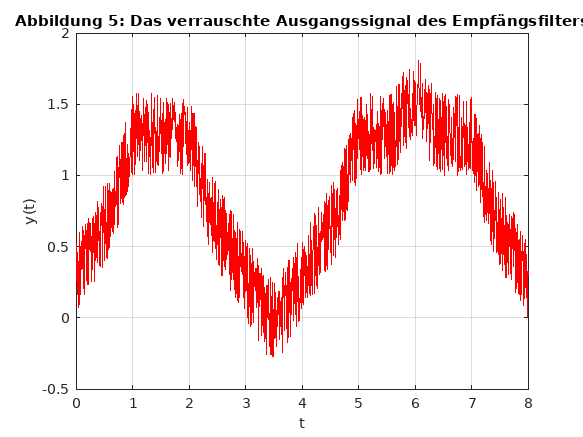

In [29]:
% Verlauf einer Musterfunktion des Ausgangssignals y(t)
figure(4)
plot(t,y,'LineWidth',0.5,'Color',[1 0 0]);
axis([0 8 -0.5 2]);
grid on
title('Abbildung 5: Das verrauschte Ausgangssignal des Empfängsfilters')
xlabel('t')
ylabel('y(t)')

Aus der Folge der verrauschten Abtastwerte $y(nT)$ wird im Empfänger
eine Folge $a_{\text{en}}$von Bits geschätzt.

-   Abtastung des verrauschten Ausgangssignals:
    $y_{i} = y(i \bullet T + T)$

-   Eingestellte Schwelle: C=0.5

-   Schätzung der Datenbits aus den verrauschten Abtastwerten:

$$a_{\text{en}_{i}} = 1\ ,\ \ wenn\ y_{i} > C$$

$$a_{\text{en}_{i}} = 0,\ \ wenn\ y_{i} \leq C$$

Zum Vergleich sind auf dem Matlab-Command-Window die gesendeten
Datenbits$\text{\ a}_{i}$, die verrauschten Abtastwerte$y_{i}$ am
Ausgang des Empfängers sowie die geschätzten
Datenbits$\text{\ a}_{en,i}$dargestellt.

Eine Bitfehlersumme lässt sich durch folgende Beziehung berechnen.

Bitfehlersumme:

Damit ergibt sich mit den obigen Einstellungen (ursprüngliche Folge mit
$T_{D} = 1.0$und  
$n_{\max} = 0.29$) eine Fehlersumme zu error = 0.

Experimentieren Sie mit verschiedenen Rausch-Stärken
(Parameter$\text{\ n}_{\max}$) und untersuchen Sie die
Abtastwerte$\text{\ y}_{i}$. Beachten Sie die Anzahl der fehlerhaften
Datenbits.

In [34]:
n_max = 0.34;
n_e = 2*(n_max*rand(1,length(t))-n_max/2);
y = g_TD + n_e;

bit_stats_noise(a, y, C, n_max)

n_max:
    0.3400

die gesendeten Datenbits a[i]:
     1     1     0     0     1     1     1     0

die verrauschten Abtastwerte y[i]:
    1.5494    1.6487    0.3219    0.5940    1.5105    2.0342    1.5163    0.4233

die geschätzten Datenbits a_en[i]:
     1     1     0     1     1     1     1     0

Anzahl der fehlerhaften Datenbits (mit Rauschen):
     1



Verändern Sie auch die Dauer der Autokorrelationsfunktion$T_{D}$ auf
höhere Werte.

In [33]:
TD=1.8
Dif = TD - 1;
g_TD = 0;
for i = 0:7 
    g_TD = g_TD + a(i+1)*(((heaviside(t-i+Dif)-heaviside(t-i-1)).*(t/TD-i/TD+(1-1/TD)))...
                +((heaviside(t-i-1)-heaviside(t-i-2-Dif)).*(i/TD-t/TD+(1+TD)/TD)));
end
y = g_TD + n_e;

bit_stats_noise(a, y, C, n_max)

TD = 1.8000

n_max:
    0.3900

die gesendeten Datenbits a[i]:
     1     1     0     0     1     1     1     0

die verrauschten Abtastwerte y[i]:
    1.7822    1.2764    0.2245    0.7083    1.5881    1.6103    1.1923    0.8163

die geschätzten Datenbits a_en[i]:
     1     1     0     1     1     1     1     1

Anzahl der fehlerhaften Datenbits (mit Rauschen):
     2

